### 1. Install Dependencies

In [ ]:
%pip install torch torchvision clip-by-openai pillow

In [1]:
import ipywidgets as widgets
from IPython.display import display
import time

output = widgets.Output()
display(output)

Output()

In [2]:
import torch
print(torch.cuda.is_available())  # Should return True if CUDA is available
print(torch.cuda.device_count())  # Number of available GPUs
print(torch.cuda.current_device())  # Current device being used by CUDA


True
1
0


### 2. Load CLIP Model

In [ ]:
#import torch
import clip
import os
from PIL import Image
import matplotlib.pyplot as plt
import random

# Load the CLIP model (ViT-B/32 is the default)
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

### 3. Extract Image Features

In [ ]:
# def extract_image_features(image_path):
#     image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
#     with torch.no_grad():
#         image_features = model.encode_image(image)
#     return image_features / image_features.norm(dim=-1, keepdim=True)  # Normalize

In [ ]:
# # Load images and compute embeddings
# image_folder = "illustration_dataset"
# image_features_dict = {}

# for filename in os.listdir(image_folder):
#     if filename.lower().endswith(("png", "jpg", "jpeg")):
#         image_path = os.path.join(image_folder, filename)
#         image_features_dict[filename] = extract_image_features(image_path)

# # Save image embeddings to a file
# torch.save(image_features_dict, "image_embeddings.pt")
# print("Image embeddings saved to 'image_embeddings.pt'")

### 4. Extract Text Features

In [4]:
def extract_text_features(text):
    text_tokenized = clip.tokenize([text]).to(device)
    with torch.no_grad():
        text_features = model.encode_text(text_tokenized)
    return text_features / text_features.norm(dim=-1, keepdim=True)  # Normalize

In [8]:
def extract_text_features(text):
    print(f"Extracting features for: {text}")  # Show query being processed
    text_tokenized = clip.tokenize([text]).to(device)
    
    with torch.no_grad():
        text_features = model.encode_text(text_tokenized)
    
    # Normalize
    text_features = text_features / text_features.norm(dim=-1, keepdim=True)
    
    print(f"Extracted Features: {text_features}")  # Print extracted tensor
    return text_features

## Experimental Progress Bar

In [16]:
from tqdm import tqdm

In [59]:
def extract_text_features(text):
    status = widgets.Label(value="Ready")
    display(status)

    status.value = f"🔄 Processing: {text}"  # Update status
    
    text_tokenized = clip.tokenize([text]).to(device)

    status.value = "🚀 Encoding text with CLIP..."
    with torch.no_grad():
        text_features = model.encode_text(text_tokenized)
    
    status.value = "✅ Normalizing features..."
    text_features = text_features / text_features.norm(dim=-1, keepdim=True)
    
    status.value = "🎉 Extraction complete!"
    return text_features

In [ ]:
# Example text prompts
text_prompts = ["fisheye perspective, black hair", "fantasy landscape", "cyberpunk city", "red hair", "hoodie"]

# Compute and save text embeddings
text_features_dict = {prompt: extract_text_features(prompt) for prompt in text_prompts}
torch.save(text_features_dict, "text_embeddings.pt")
print("Text embeddings saved to 'text_embeddings.pt'")

In [5]:
# Load image embeddings
image_features_dict = torch.load("image_embeddings.pt")

# Load text embeddings
text_features_dict = torch.load("text_embeddings.pt")

### 5. Compare Images and Text (Run Code)

In [68]:
# Initialize status widget
status = widgets.Label(value="Ready")
display(status)

# Example query
query = "headphone, girl"

# Get the text features for the query
if query in text_features_dict:
    text_features = text_features_dict[query]
    status.value = f"✅ Found cached features for: {query}"
else:
    status.value = f"🔄 Computing features for: {query}"
    text_features = extract_text_features(query)  # Compute features if not cached
    status.value = f"✅ Features extracted for: {query}"

# Compute cosine similarity with a progress bar
status.value = "🚀 Computing cosine similarity..."
similarities = {}
for img_name, img_features in tqdm(image_features_dict.items(), desc="Computing Similarity"):
    similarities[img_name] = torch.cosine_similarity(text_features, img_features, dim=-1).item()

# Sort results by similarity
sorted_images = sorted(similarities.items(), key=lambda x: x[1], reverse=True)

# Display top matches
status.value = "🎉 Displaying top matches..."
for img, score in sorted_images[:8]:
    print(f"{img}: {score:.4f}")

status.value = "✅ Completed!"

Label(value='Ready')

Label(value='Ready')

Computing Similarity: 100%|██████████| 71091/71091 [00:19<00:00, 3687.47it/s]


79205172_p0_master1200.jpg: 0.3462
80008366_p0_master1200.jpg: 0.3394
79117307_p0_master1200.jpg: 0.3367
82942536_p0_master1200.jpg: 0.3303
84103296_p0_master1200.jpg: 0.3303
85352723_p0_master1200.jpg: 0.3301
83539426_p0_master1200.jpg: 0.3267
82056748_p0_master1200.jpg: 0.3250


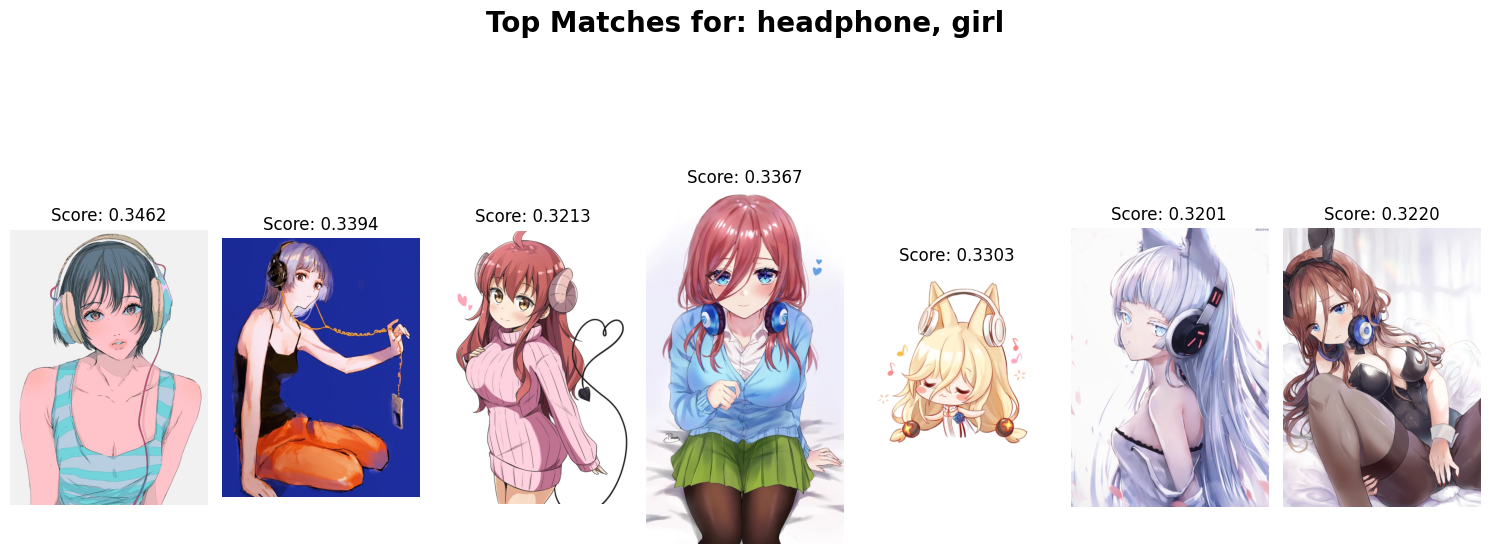

In [ ]:
# Display top matches
top_k = 7  # Number of images to display
plt.figure(figsize=(15, 7))  # Set the figure size

# Add a title to the entire plot
plt.suptitle(f"Top Matches for: {query}", fontsize=20, fontweight='bold')

image_folder = "illustration_dataset"

# Shuffle and pick random images from the top 50 results
top_n = 20  # Consider the top 50 instead of just top_k
random_subset = random.sample(sorted_images[:top_n], top_k)  # Pick top_k randomly

for i, (img, score) in enumerate(random_subset):
    # Load the image
    image_path = os.path.join(image_folder, img)
    image = Image.open(image_path)
    
    # Plot the image
    plt.subplot(1, top_k, i + 1)
    plt.imshow(image)
    plt.title(f"Score: {score:.4f}")
    plt.axis('off')  # Hide axes

plt.subplots_adjust(top=0.55)
plt.tight_layout()
plt.show()

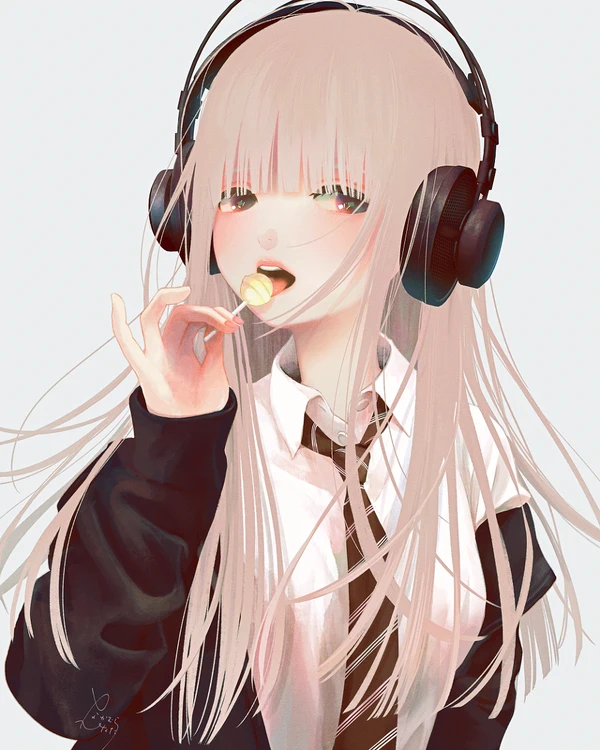

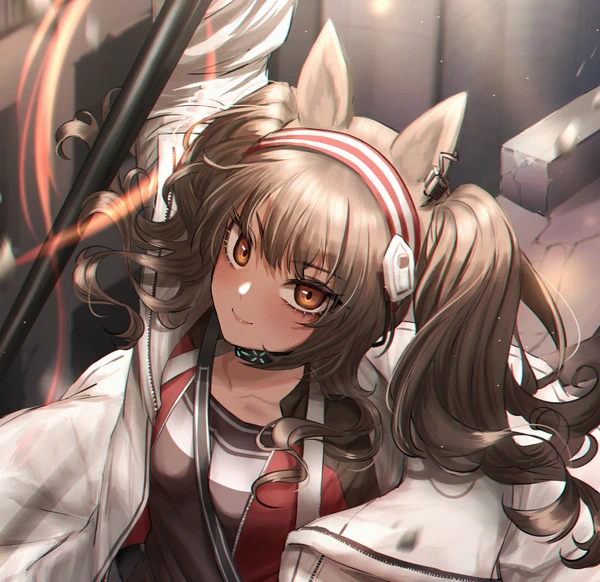

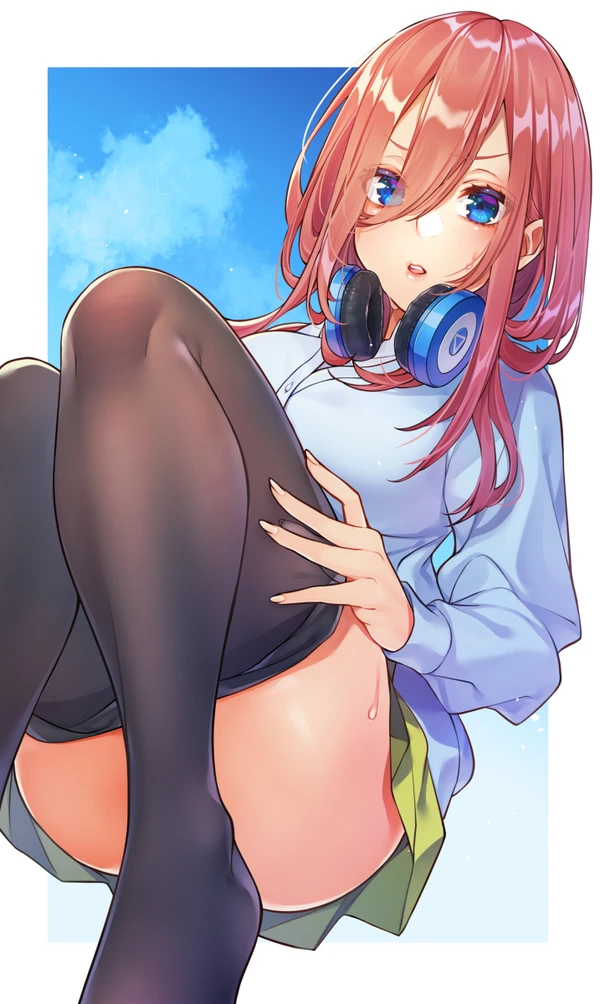

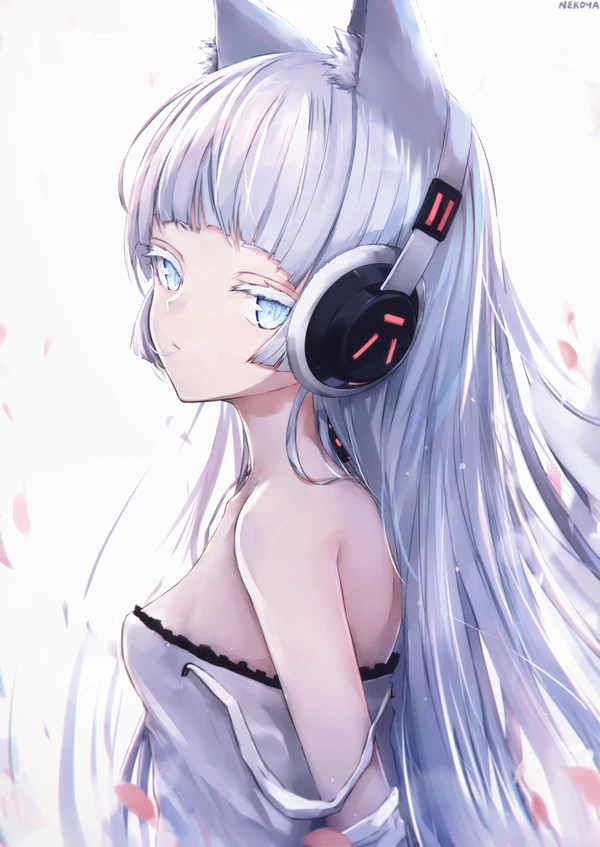

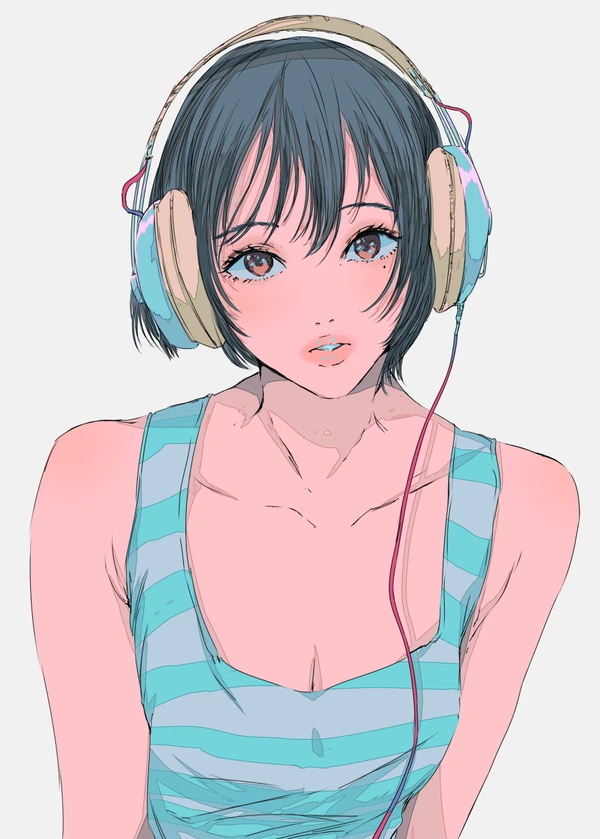

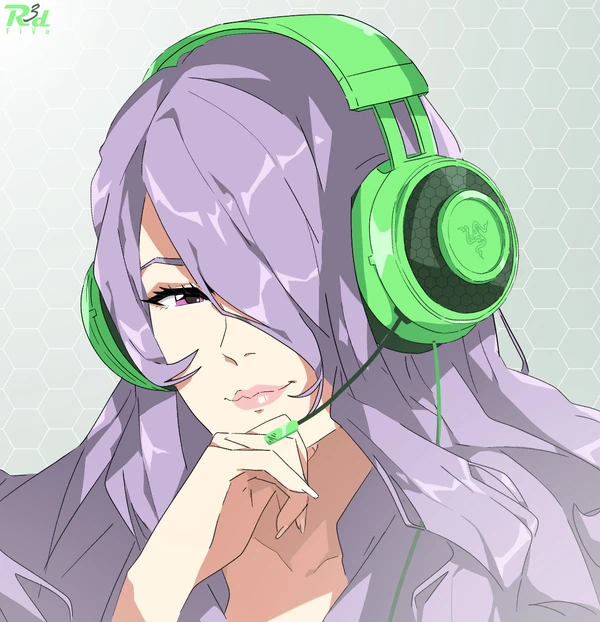

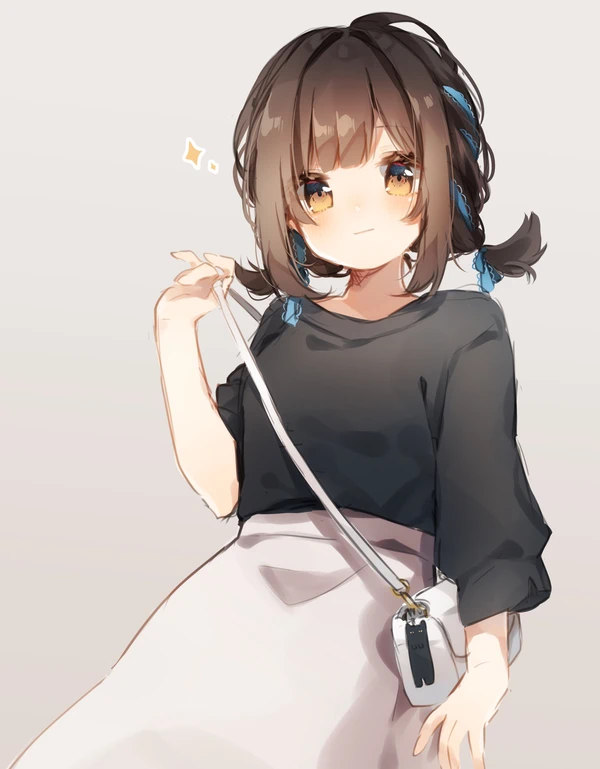

<Figure size 1800x600 with 0 Axes>

In [ ]:
# Display top matches
top_k = 7  # Number of images to display
top_n = 20  # Consider the top 50 instead of just top_k

# Add a title to the entire plot
plt.figure(figsize=(18, 6))  # Set the figure size

# Shuffle and pick random images from the top 50 results
random_subset = random.sample(sorted_images[:top_n], top_k)  # Pick top_k randomly

# Image folder path
image_folder = "illustration_dataset"

# Display top matches
top_k = 7  # Number of images to display
top_n = 20  # Consider the top 50 instead of just top_k

# Shuffle and pick random images from the top 50 results
random_subset = random.sample(sorted_images[:top_n], top_k)  # Pick top_k randomly

# Image folder path
image_folder = "illustration_dataset"

# Display images as separate figures
for i, (img, score) in enumerate(random_subset):
    image_path = os.path.join(image_folder, img)
    image = Image.open(image_path)
    
    # Display without margins
    display(image)  # This will display the image directly in the notebook